In [9]:
import pandas as pd
import numpy as np

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
df = pd.read_csv("/content/drive/MyDrive/GCCR_SlackAPI/Dataset/UserNameCountry_GCChemosensoryRSlack_output123.csv")
df


,id,Channel,Year,Month,Day,Date,text,type,subtype,real_name,Country,City,Continent
0,U010H1EC3J8,agreement_sign,2020,3,27,27-03-2020,<@U010H1EC3J8> has joined the channel,message,channel_join,Chrissi Kelly,UK,London,Europe
1,U010H1EC3J8,agreement_sign,2020,3,27,27-03-2020,<@U010H1EC3J8> set the channel purpose: The ch...,message,channel_purpose,Chrissi Kelly,UK,London,Europe
2,U010H1EC3J8,agreement_sign,2020,3,27,27-03-2020,In this channel I will be taking the lead in e...,message,NaN,Chrissi Kelly,UK,London,Europe
3,U010H1EC3J8,agreement_sign,2020,3,27,27-03-2020,I have received and signed. But I thought I wo...,message,NaN,Chrissi Kelly,UK,London,Europe
4,U010H1EC3J8,agreement_sign,2020,3,27,27-03-2020,here is a link to the agreement form. <https:/...,message,NaN,Chrissi Kelly,UK,London,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17220,U016CDHF52N,_turkey,2020,7,1,01-07-2020,<@U016CDHF52N> has joined the channel,message,channel_join,Özlem Saatci,Turkey,Istanbul,Asia
17221,U013S0T3QAF,_turkey,2020,7,10,10-07-2020,<@U013S0T3QAF> has joined the channel,message,channel_join,Serkan Selli,Turkey,Istanbul,Asia
17222,U010YQGR21E,_usa,2020,4,8,08-04-2020,"Hi All,",message,NaN,Susan E Coldwell,USA,New_York,America
17223,U010YQGR21E,_usa,2020,4,8,08-04-2020,UW School of Dentistry is seeing emergency pat...,message,NaN,Susan E Coldwell,USA,New_York,America


In [12]:
df.describe(include='all')

,id,Channel,Year,Month,Day,Date,text,type,subtype,real_name,Country,City,Continent
count,17225,17225,17225.0,17225.000000,17225.000000,17225,16977,17225,3125,16644,16644,16644,16644
unique,575,123,NaN,NaN,NaN,267,13981,1,7,450,32,38,7
top,U010GME5DU4,key_announcements,NaN,NaN,NaN,27-03-2020,<@U010GME5DU4> has joined the channel,message,channel_join,Valentina Parma,USA,Amsterdam,Europe
freq,1026,1681,NaN,NaN,NaN,2340,87,17225,2942,1026,5541,4837,7973
mean,NaN,NaN,2020.0,4.749840,18.627576,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.0,2.069831,8.950553,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,2020.0,3.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,2020.0,3.000000,11.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,2020.0,4.000000,21.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,2020.0,5.000000,27.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df['Date'] =  pd.to_datetime(df['Date'])

In [14]:
df.describe(include='all', datetime_is_numeric=True)

,id,Channel,Year,Month,Day,Date,text,type,subtype,real_name,Country,City,Continent
count,17225,17225,17225.0,17225.000000,17225.000000,17225,16977,17225,3125,16644,16644,16644,16644
unique,575,123,NaN,NaN,NaN,NaN,13981,1,7,450,32,38,7
top,U010GME5DU4,key_announcements,NaN,NaN,NaN,NaN,<@U010GME5DU4> has joined the channel,message,channel_join,Valentina Parma,USA,Amsterdam,Europe
freq,1026,1681,NaN,NaN,NaN,NaN,87,17225,2942,1026,5541,4837,7973
mean,NaN,NaN,2020.0,4.749840,18.627576,2020-05-21 03:28:59.912955648,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,2020.0,3.000000,1.000000,2020-01-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,2020.0,3.000000,11.000000,2020-03-27 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,2020.0,4.000000,21.000000,2020-04-21 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,2020.0,5.000000,27.000000,2020-07-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,2020.0,12.000000,31.000000,2020-12-14 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
channel_count = df['Channel'].value_counts()
channel_count_values = df['Channel'].value_counts().keys().tolist()
channel_count_counts = df['Channel'].value_counts().tolist()

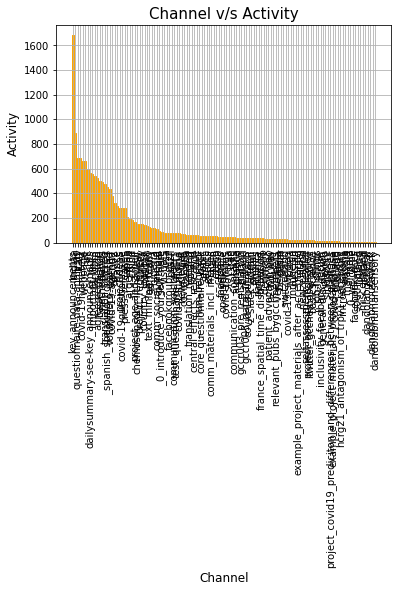

In [16]:
import matplotlib.pyplot as plt 
import matplotlib

plt.title('Channel v/s Activity', fontsize="15")
plt.xlabel('Channel',fontsize="12")
plt.ylabel('Activity',fontsize="12")
###### Important ==>
plt.bar(channel_count_values,channel_count_counts, color = 'orange', edgecolor = 'orange')
plt.xticks(rotation = 90)
plt.grid()
matplotlib.rcParams['figure.figsize'] = [80,40]
plt.show()

In [17]:
user_count = df['id'].value_counts()
user_count = df['id'].value_counts()
user_count_values = df['id'].value_counts().keys().tolist()
user_count_counts = df['id'].value_counts().tolist()
user_count

U010GME5DU4    1026
U010KDF9AVD     789
U010616MZ99     506
U010KM0A4KG     488
U010LKHD4RK     416
               ... 
U01109GA3UM       1
U010ZBBTKS4       1
U011BJQ8AKF       1
U010M7R7VJ7       1
U011WFXNX2T       1
Name: id, Length: 575, dtype: int64

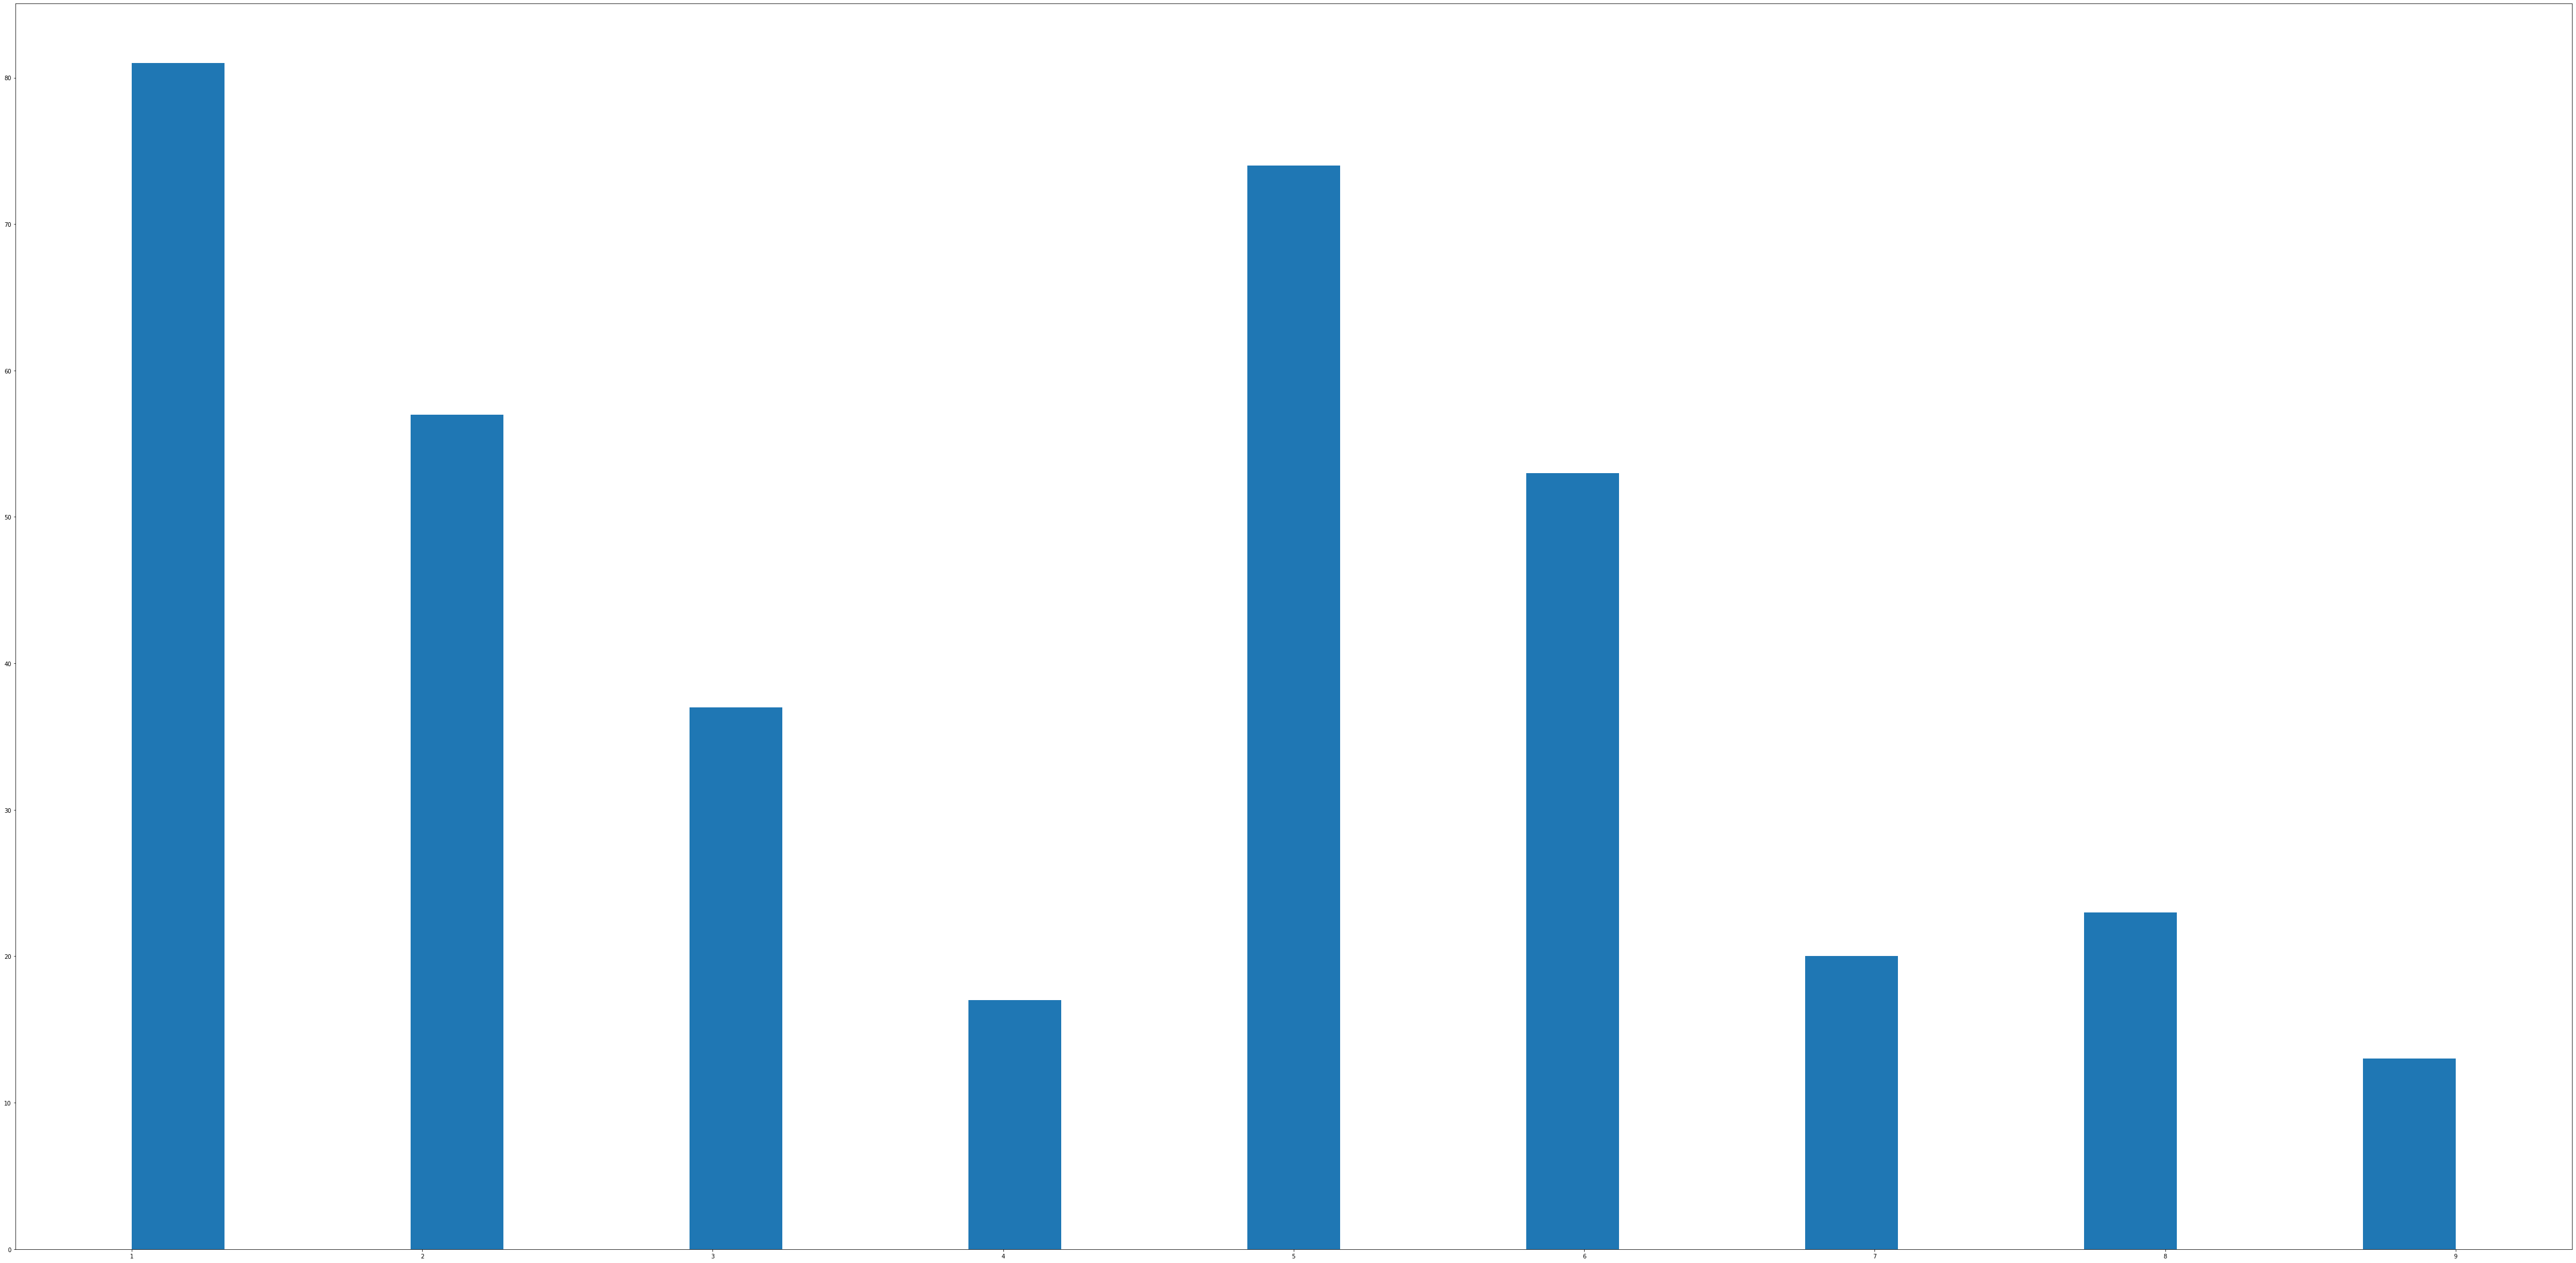

In [18]:
plt.hist(user_count_counts[200:],bins=25)
matplotlib.rcParams['figure.figsize'] = [10,5]

plt.show()

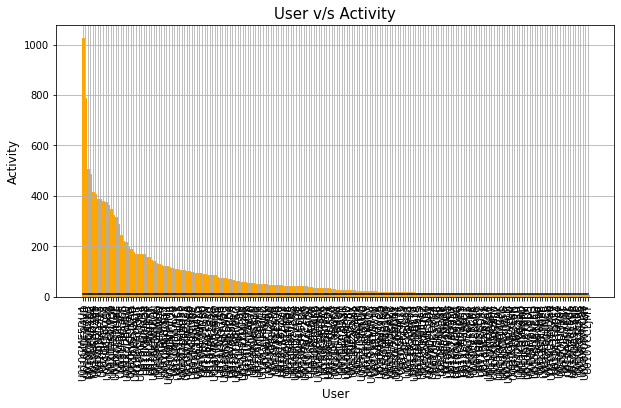

In [19]:
import matplotlib.pyplot as plt 
import matplotlib

plt.title('User v/s Activity', fontsize="15")
plt.xlabel('User',fontsize="12")
plt.ylabel('Activity',fontsize="12")
###### Important ==>
plt.bar(user_count_values[:200], user_count_counts[:200], color = 'orange', edgecolor = 'orange')
plt.plot(user_count_values[:200],[10 for i in range(200)], color = 'black')
plt.xticks(rotation = 90)
plt.grid()
matplotlib.rcParams['figure.figsize'] = [80,40]
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


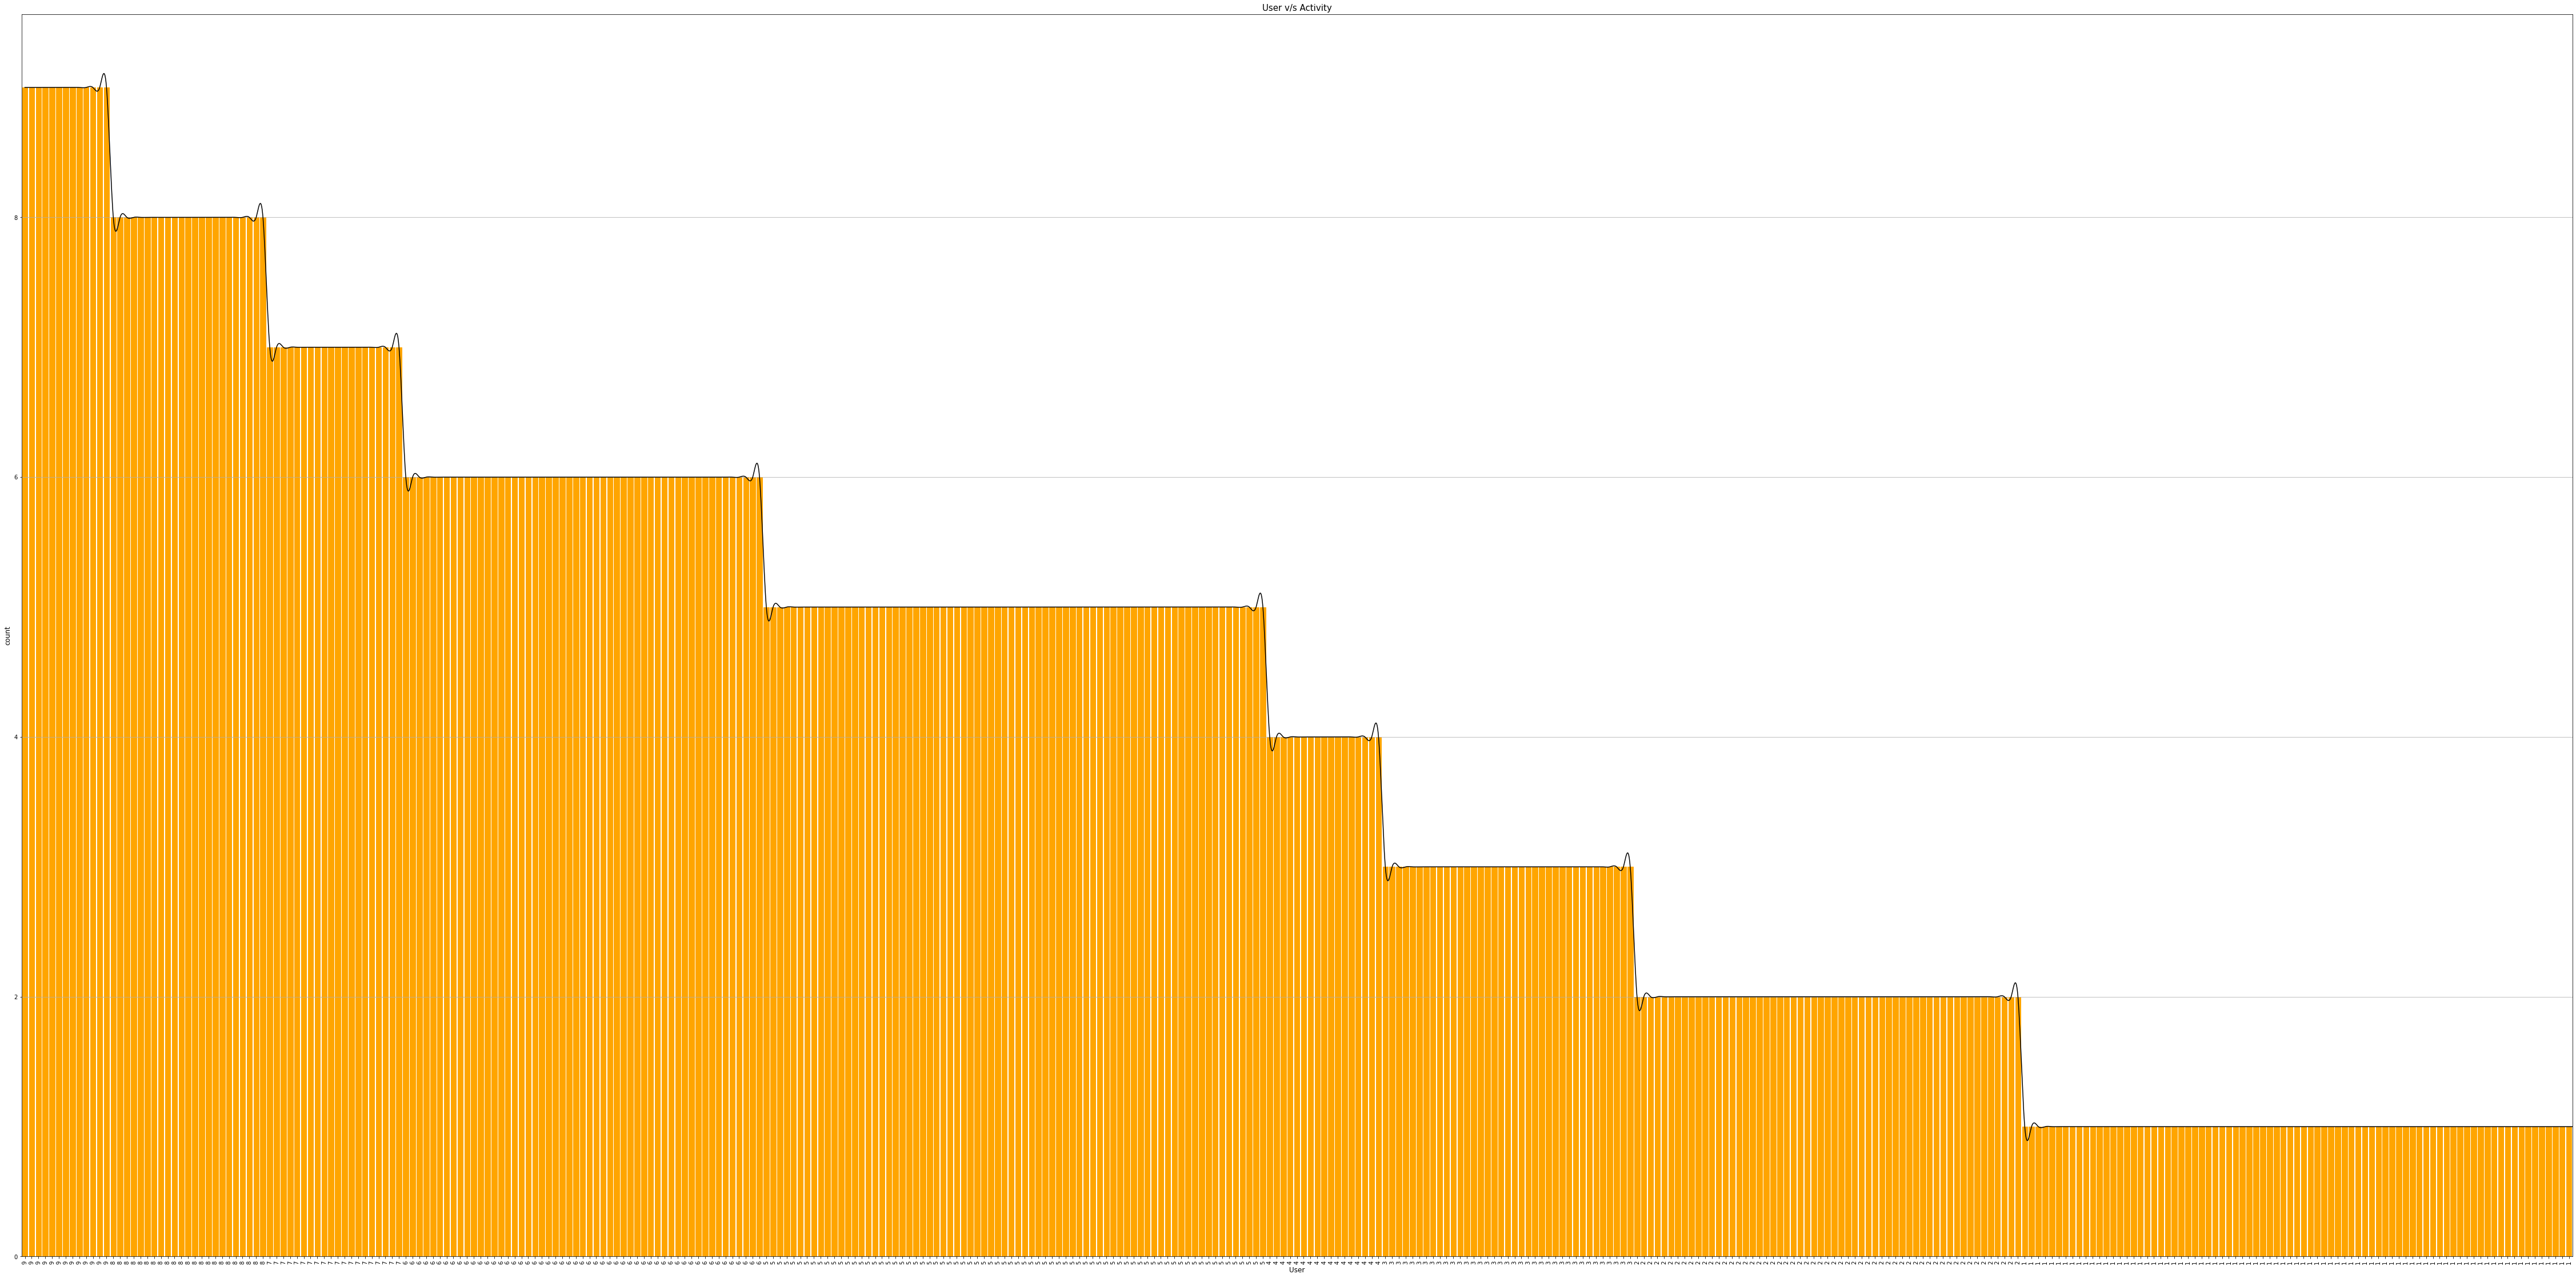

In [20]:
import matplotlib.pyplot as plt 
import matplotlib
import seaborn as sns
import scipy.interpolate


plt.title('User v/s Activity', fontsize="15")
plt.xlabel('User',fontsize="12")
plt.ylabel('Activity',fontsize="12")
###### Important ==>
x=np.arange(0,len(user_count_values[200:]))
y=user_count_counts[200:]
plt.bar( x, y, color = 'orange', edgecolor = 'orange')


x_new = np.linspace(0,len(user_count_values[200:]), 5000)
a_BSpline = scipy.interpolate.make_interp_spline(x, y)
y_new = a_BSpline(x_new)

plt.plot(x_new, y_new, color = 'black')


#plt.plot(user_count_values[:200],[10 for i in range(200)], color = 'black')
plt.xticks(rotation = 90)
plt.grid()
matplotlib.rcParams['figure.figsize'] = [20,5]

sns.countplot(user_count_values[200:], order=user_count_counts[200:], color='g', alpha=0.5)

plt.show()

In [21]:
x

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [22]:
m = np.arange(0,len(user_count_values[200:]))
print(len(m))

len(user_count_values[200:])

375


375

In [23]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import poisson

def func(k, lamb):
    '''poisson function, parameter lamb is the fit parameter'''
    return poisson.pmf(k, lamb)


# curve fit the data using curve_fit's default inital parameter estimates
fittedParameters, pcov = curve_fit(func, len(user_count_values[200:]), user_count_counts[200:])

y_fit = func(xData, *fittedParameters)

plt.bar(xData, yData) # plot the raw data as bar chart
plt.plot(xData, y_fit) # plot the equation using the fitted parameters
plt.show()

/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


NameError: ignored

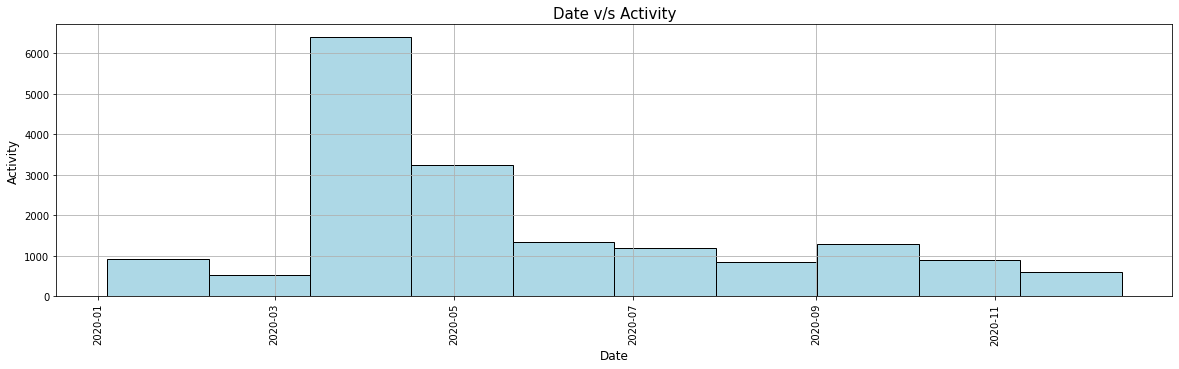

In [24]:
plt.title('Date v/s Activity', fontsize="15")
plt.xlabel('Date',fontsize="12")
plt.ylabel('Activity',fontsize="12")
###### Important ==>
plt.hist(df['Date'],bins=10,edgecolor='black',color='lightblue')
plt.xticks(rotation = 90)
plt.grid()
matplotlib.rcParams['figure.figsize'] = [20,5]
plt.show()

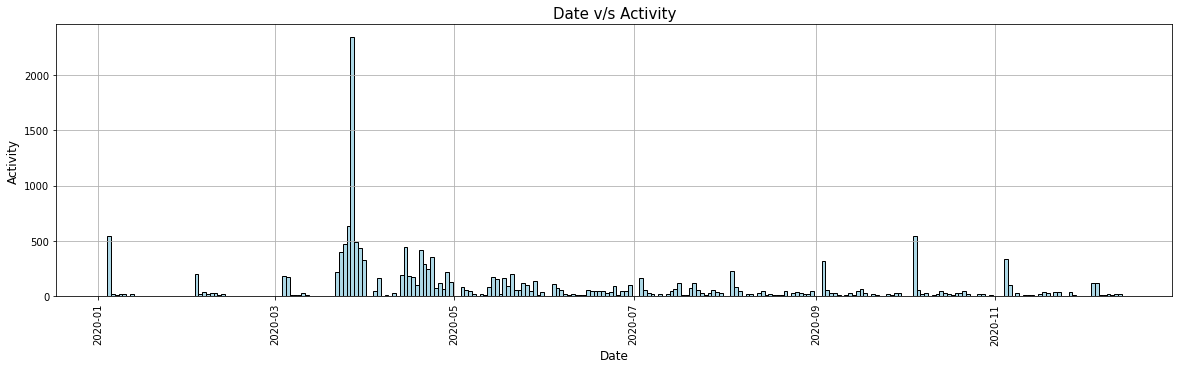

In [25]:
plt.title('Date v/s Activity', fontsize="15")
plt.xlabel('Date',fontsize="12")
plt.ylabel('Activity',fontsize="12")
###### Important ==>
plt.hist(df['Date'],bins=267,edgecolor='black',color='lightblue')
plt.xticks(rotation = 90)
plt.grid()
matplotlib.rcParams['figure.figsize'] = [80,40]
plt.show()

In [26]:
date_count = df['Date'].value_counts()
date_count

2020-03-27    2340
2020-03-26     631
2020-03-25     476
2020-10-04     462
2020-03-30     433
              ... 
2020-05-12       2
2020-08-08       1
2020-10-24       1
2020-11-07       1
2020-09-23       1
Name: Date, Length: 267, dtype: int64

In [27]:
date_count = df['Date'].value_counts()
sorted_x = sorted(date_count.items(), key=lambda kv: kv[0], reverse=True)
unique_date=[]
unique_date_frequency=[]
for i in sorted_x:
    unique_date.append(i[0])
    unique_date_frequency.append(i[1])

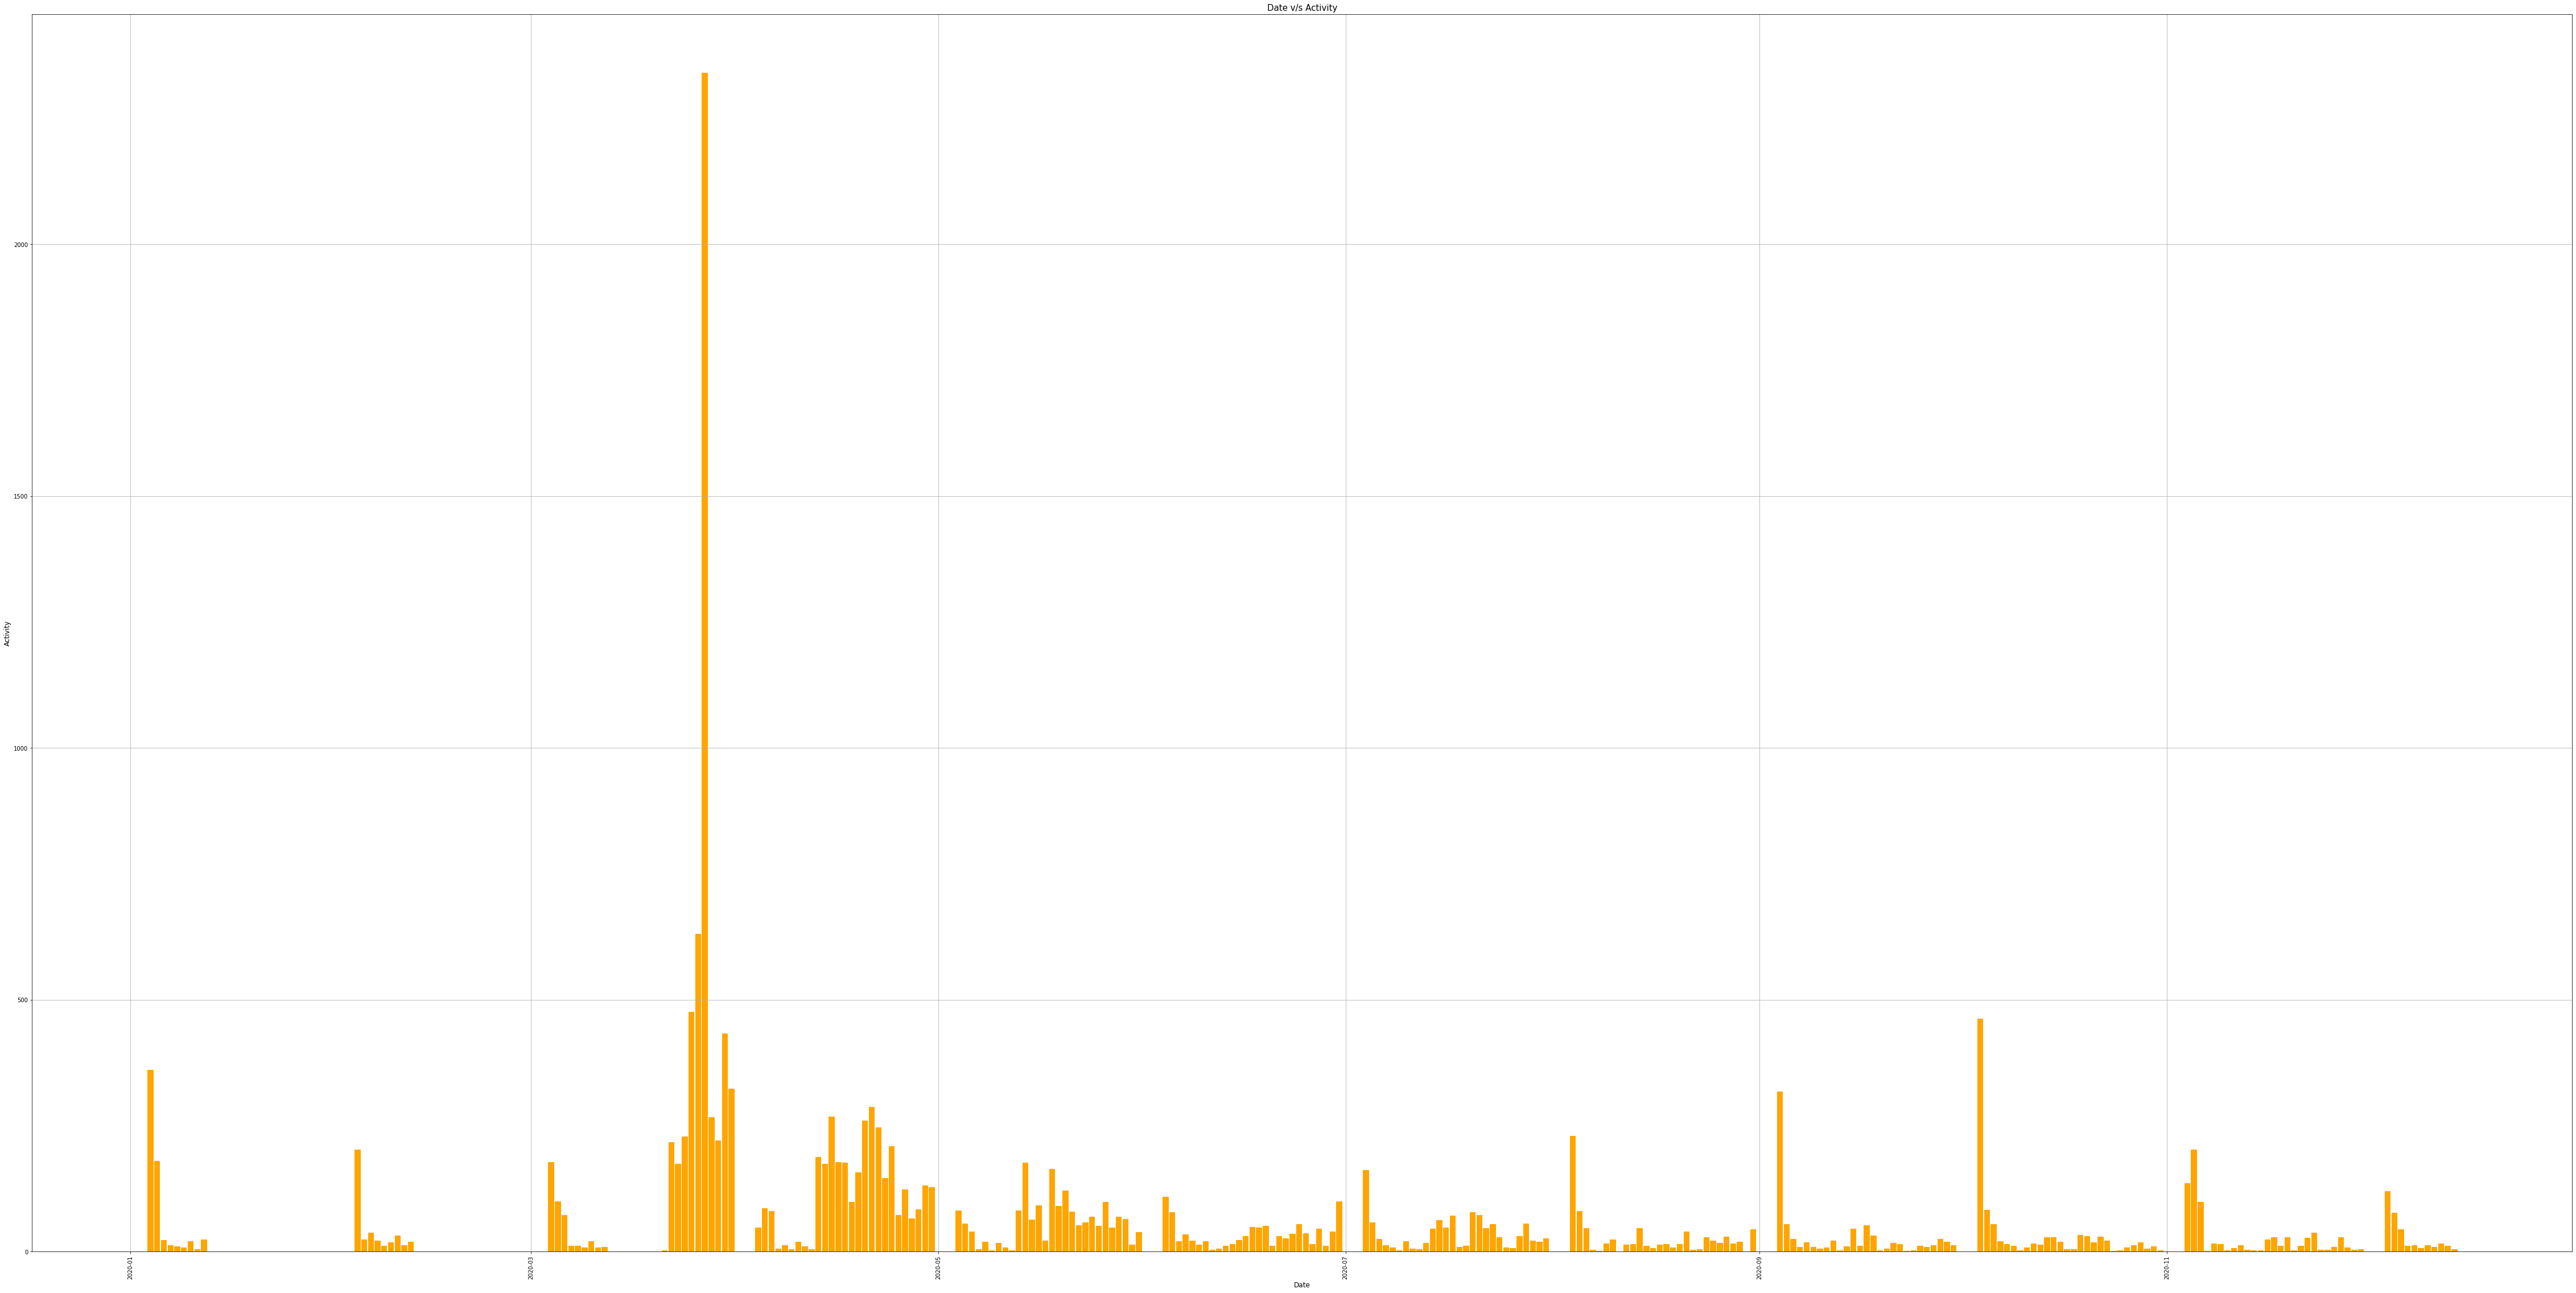

In [28]:
import matplotlib.pyplot as plt 
import matplotlib

plt.title('Date v/s Activity', fontsize="15")
plt.xlabel('Date',fontsize="12")
plt.ylabel('Activity',fontsize="12")
###### Important ==>
plt.bar(unique_date,unique_date_frequency, color = 'orange', edgecolor = 'orange')
plt.xticks(rotation = 90)
plt.grid()
matplotlib.rcParams['figure.figsize'] = [80,40]
plt.show()

In [29]:
Channel_count = df['Channel'].value_counts()
sorted_c = sorted(Channel_count.items(), key=lambda kv: kv[1], reverse=True)
unique_Channel_count=[]
unique_Channel_count_frequency=[]
unique_Channel_count.append('Date')
unique_Channel_count_frequency.append('')
for i in sorted_c:
    unique_Channel_count.append(i[0])
    unique_Channel_count_frequency.append(i[1])
sorted_c

[('key_announcements', 1681),
 ('_indiaa', 890),
 ('questionnaire-data-analysis', 688),
 ('_italy', 685),
 ('covid-19hometest', 666),
 ('webpage', 660),
 ('_uk', 595),
 ('dailysummary-see-key_announcements', 567),
 ('important_links', 560),
 ('random', 543),
 ('agreement_sign', 522),
 ('basic-science', 502),
 ('_netherlands', 492),
 ('translation_offered', 474),
 ('_spanish_speaking_countries', 450),
 ('volunteers_wanted', 436),
 ('covid-19-agenda', 377),
 ('eds002', 319),
 ('_france', 297),
 ('projectideas', 279),
 ('covid-19questionnaire', 279),
 ('press_releases', 277),
 ('_japan', 211),
 ('_argentina', 191),
 ('_china', 181),
 ('project_age-and-smell', 168),
 ('chemosensory_lit-review', 153),
 ('project_recovery', 151),
 ('_turkey', 147),
 ('country_leaders', 140),
 ('_sweden', 136),
 ('text_mining_team', 123),
 ('_germany', 121),
 ('_nigeria', 115),
 ('comm_social_media', 108),
 ('_portugal', 96),
 ('_0_introduce_yourself_here', 83),
 ('visuals', 81),
 ('_usa', 78),
 ('facebookgro

In [30]:
column_names = unique_Channel_count

In [31]:
timeseries =  pd.DataFrame(columns = column_names)
timeseries.assign(Date=unique_date)

,Date,key_announcements,_indiaa,questionnaire-data-analysis,_italy,covid-19hometest,webpage,_uk,dailysummary-see-key_announcements,important_links,random,agreement_sign,basic-science,_netherlands,translation_offered,_spanish_speaking_countries,volunteers_wanted,covid-19-agenda,eds002,_france,projectideas,covid-19questionnaire,press_releases,_japan,_argentina,_china,project_age-and-smell,chemosensory_lit-review,project_recovery,_turkey,country_leaders,_sweden,text_mining_team,_germany,_nigeria,comm_social_media,_portugal,_0_introduce_yourself_here,visuals,_usa,...,_venezuela,_belgium,_qatar,_switzerland,covid-19-sweden,_korea,_indonesia,_russian,example_project_materials_after_acceptance,_israel,_newzealand,selfassessment_leaflet,project_obesity-and-smell,twitter_gcchemosensoryr,basicscience,r_shiny,job-listings,inclusivity_feedback_forum,general_discussion,_mexico,_singapore,project_covid19_prediciton_and_differences_between_countries,example_project_materials_proposal_phase,covid-and-age,_thailand,hcrg21_antagonism_of_trpv1_receptors,introductions,_austria,_malaysia,_india,_0_welcome,facebook_gccr,_south_africa,finland,miscellanea,_ireland,dandolabgeneral,mexico,dandolabmousework,dandolabhumansensory
0,2020-12-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-12-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-12-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-12-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-12-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,2020-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,2020-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
264,2020-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [32]:
for channel_name in unique_Channel_count[1:]:
    print(channel_name)
    for date_instance in unique_date:
        channel_df = df[ (df['Channel'] == channel_name) & (df['Date'] == date_instance)]
        timeseries.at[date_instance, channel_name] = len(channel_df)


key_announcements
_indiaa
questionnaire-data-analysis
_italy
covid-19hometest
webpage
_uk
dailysummary-see-key_announcements
important_links
random
agreement_sign
basic-science
_netherlands
translation_offered
_spanish_speaking_countries
volunteers_wanted
covid-19-agenda
eds002
_france
projectideas
covid-19questionnaire
press_releases
_japan
_argentina
_china
project_age-and-smell
chemosensory_lit-review
project_recovery
_turkey
country_leaders
_sweden
text_mining_team
_germany
_nigeria
comm_social_media
_portugal
_0_introduce_yourself_here
visuals
_usa
facebookgroup_gccr
_brazil
communication_volunteers
test_questionnaire_draft1
covid-19funding
newsletter
covid-19irb
_canada
translation_needed
_poland
central_effects_research
_chile
hum-beh-repl
core_questionnaire_back
_arabic
_africa
events
comm_materials_incl_images
_spain
_czech
_croatia
foodprefs
openscience
covid-19mtgs
_slovenia
_iran
communication_contacts
_australia
_greece
gccr003_pre_registration
_finland
gccr003_data_analys

In [33]:
timeseries = timeseries.drop('Date',axis=1)

timeseries['Date'] = timeseries.index
timeseries

,key_announcements,_indiaa,questionnaire-data-analysis,_italy,covid-19hometest,webpage,_uk,dailysummary-see-key_announcements,important_links,random,agreement_sign,basic-science,_netherlands,translation_offered,_spanish_speaking_countries,volunteers_wanted,covid-19-agenda,eds002,_france,projectideas,covid-19questionnaire,press_releases,_japan,_argentina,_china,project_age-and-smell,chemosensory_lit-review,project_recovery,_turkey,country_leaders,_sweden,text_mining_team,_germany,_nigeria,comm_social_media,_portugal,_0_introduce_yourself_here,visuals,_usa,facebookgroup_gccr,...,_belgium,_qatar,_switzerland,covid-19-sweden,_korea,_indonesia,_russian,example_project_materials_after_acceptance,_israel,_newzealand,selfassessment_leaflet,project_obesity-and-smell,twitter_gcchemosensoryr,basicscience,r_shiny,job-listings,inclusivity_feedback_forum,general_discussion,_mexico,_singapore,project_covid19_prediciton_and_differences_between_countries,example_project_materials_proposal_phase,covid-and-age,_thailand,hcrg21_antagonism_of_trpv1_receptors,introductions,_austria,_malaysia,_india,_0_welcome,facebook_gccr,_south_africa,finland,miscellanea,_ireland,dandolabgeneral,mexico,dandolabmousework,dandolabhumansensory,Date
2020-12-14,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2020-12-14
2020-12-13,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2020-12-13
2020-12-12,1,0,0,0,0,4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2020-12-12
2020-12-11,1,0,0,0,0,1,0,0,0,3,0,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2020-12-11
2020-12-10,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2020-12-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-08,3,0,0,0,0,0,0,0,0,6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2020-01-08
2020-01-07,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2020-01-07
2020-01-06,1,0,0,3,0,0,0,0,0,2,0,4,0,0,0,0,0,6,0,0,0,2,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2020-01-06
2020-01-05,4,8,58,0,0,23,17,0,0,11,0,0,0,4,0,0,0,0,0,0,0,12,2,0,0,0,0,0,0,0,0,4,0,0,0,0,0,19,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2020-01-05


In [34]:
timeseries.to_excel('timeseries.xlsx')

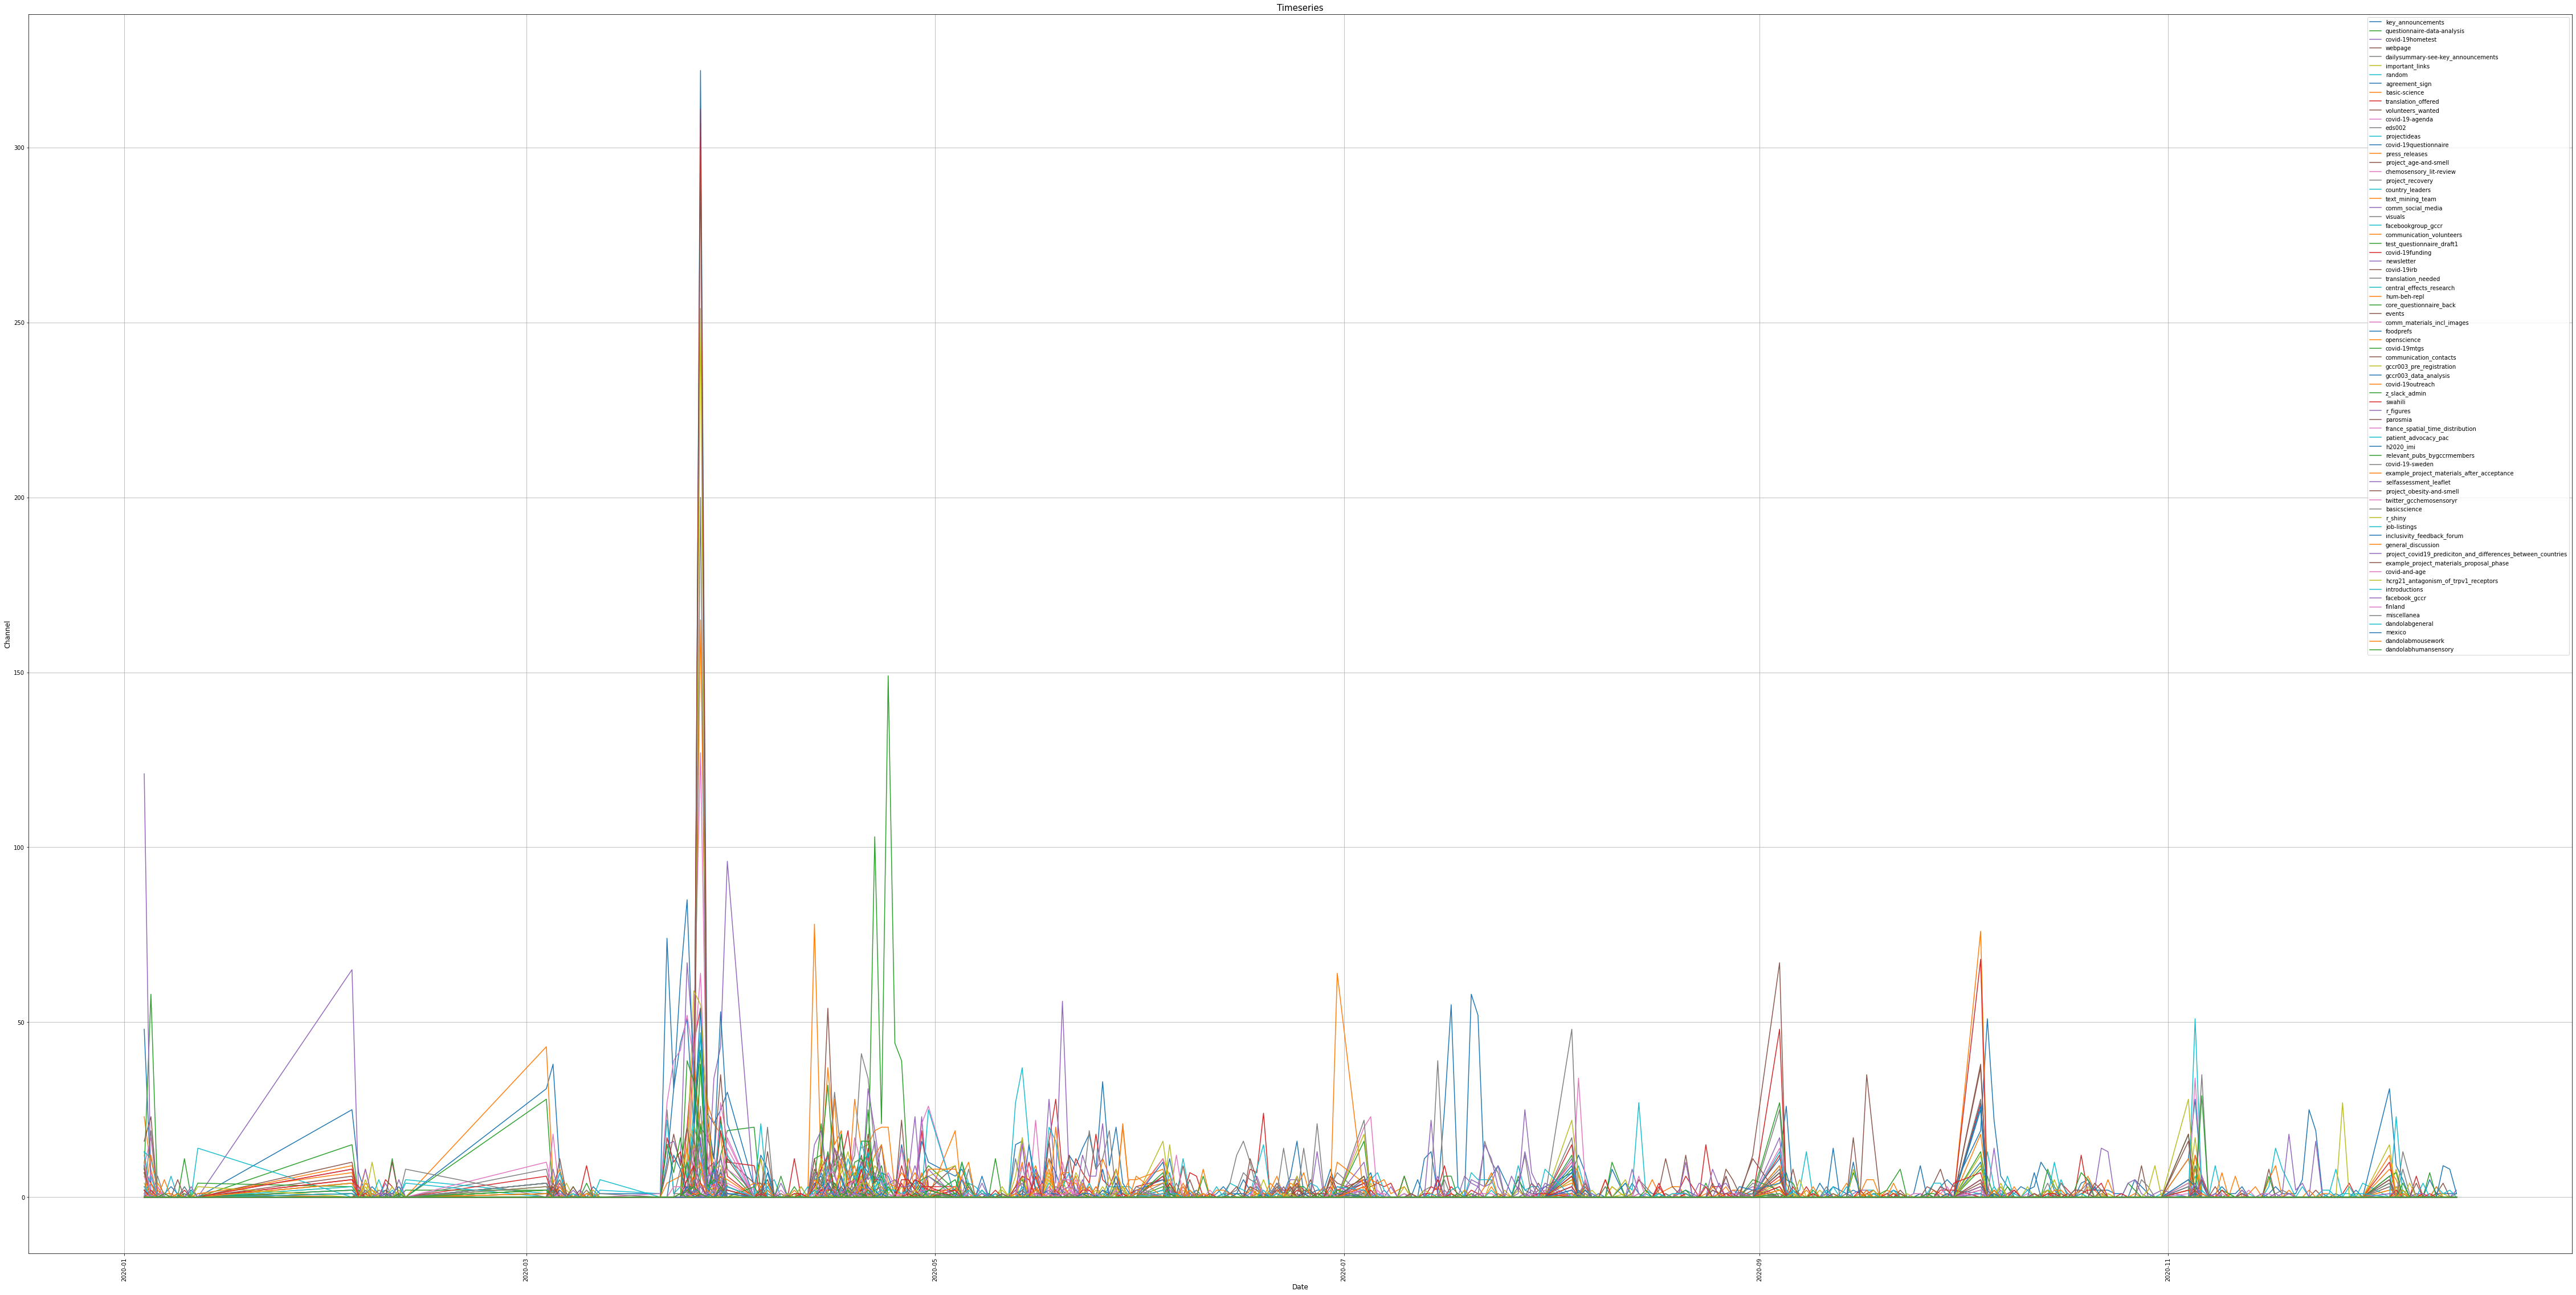

In [35]:
matplotlib.rcParams['figure.figsize'] = [80,40]

for channel_name in unique_Channel_count[1:]:
    #print(channel_name)
    plt.plot(timeseries['Date'], timeseries[channel_name],label=channel_name)

plt.title('Timeseries', fontsize="15")
plt.xlabel('Date',fontsize="12")
plt.ylabel('Channel',fontsize="12")    

plt.legend()
plt.xticks(rotation = 90)
plt.grid()
plt.show
plt.savefig("timeseries.svg", format="svg")


In [36]:
user_count = df['id'].value_counts()
sorted_x = sorted(user_count.items(), key=lambda kv: kv[1], reverse=True)
unique_user=[]
unique_user_frequency=[]
for i in sorted_x:
    unique_user.append(i[0])
    unique_user_frequency.append(i[1])
user_count

U010GME5DU4    1026
U010KDF9AVD     789
U010616MZ99     506
U010KM0A4KG     488
U010LKHD4RK     416
               ... 
U01109GA3UM       1
U010ZBBTKS4       1
U011BJQ8AKF       1
U010M7R7VJ7       1
U011WFXNX2T       1
Name: id, Length: 575, dtype: int64

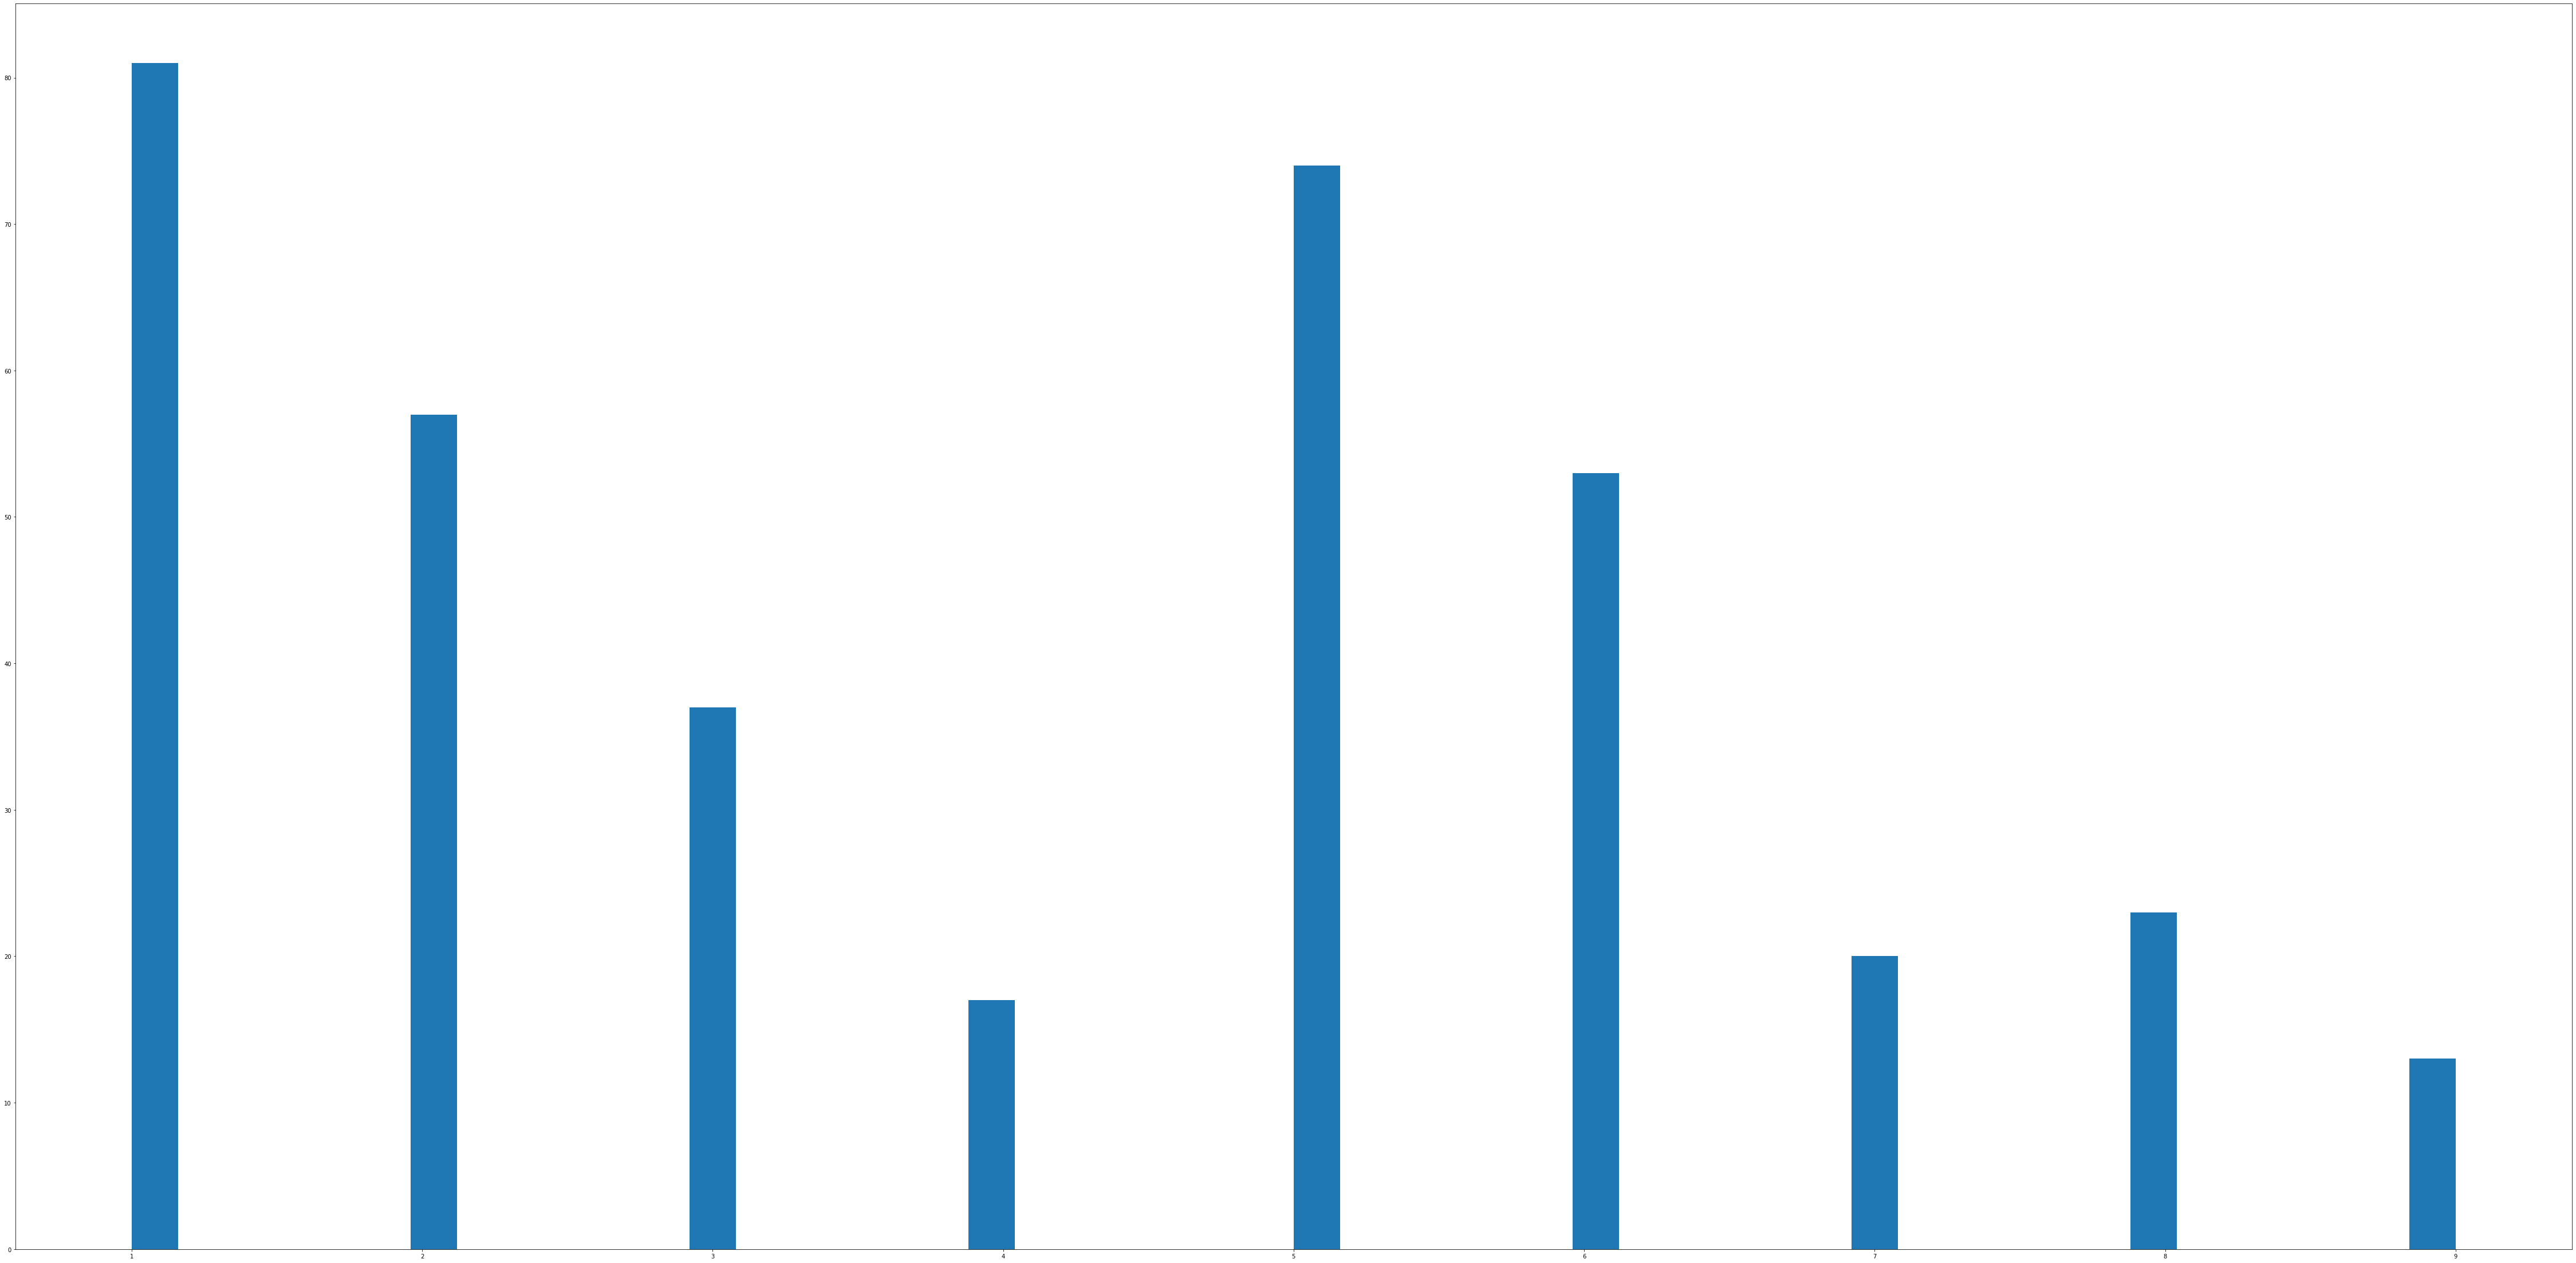

In [37]:
plt.hist(unique_user_frequency[200:],bins =50)
matplotlib.rcParams['figure.figsize'] = [20,5]

plt.show()

In [38]:
column_names = unique_Channel_count
userseries =  pd.DataFrame(columns = column_names[1:])
userseries = userseries.assign(id=unique_user)
userseries.set_index('id', inplace=True)
#userseries.assign(user=unique_user)
userseries

,key_announcements,_indiaa,questionnaire-data-analysis,_italy,covid-19hometest,webpage,_uk,dailysummary-see-key_announcements,important_links,random,agreement_sign,basic-science,_netherlands,translation_offered,_spanish_speaking_countries,volunteers_wanted,covid-19-agenda,eds002,_france,projectideas,covid-19questionnaire,press_releases,_japan,_argentina,_china,project_age-and-smell,chemosensory_lit-review,project_recovery,_turkey,country_leaders,_sweden,text_mining_team,_germany,_nigeria,comm_social_media,_portugal,_0_introduce_yourself_here,visuals,_usa,facebookgroup_gccr,...,_venezuela,_belgium,_qatar,_switzerland,covid-19-sweden,_korea,_indonesia,_russian,example_project_materials_after_acceptance,_israel,_newzealand,selfassessment_leaflet,project_obesity-and-smell,twitter_gcchemosensoryr,basicscience,r_shiny,job-listings,inclusivity_feedback_forum,general_discussion,_mexico,_singapore,project_covid19_prediciton_and_differences_between_countries,example_project_materials_proposal_phase,covid-and-age,_thailand,hcrg21_antagonism_of_trpv1_receptors,introductions,_austria,_malaysia,_india,_0_welcome,facebook_gccr,_south_africa,finland,miscellanea,_ireland,dandolabgeneral,mexico,dandolabmousework,dandolabhumansensory
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
U010GME5DU4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
U010KDF9AVD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
U010616MZ99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
U010KM0A4KG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
U010LKHD4RK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
U01109GA3UM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
U010ZBBTKS4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
U

In [39]:
for channel_name in unique_Channel_count[1:]:
    print(channel_name)
    for user_instance in unique_user:
        channel_df = df[ (df['Channel'] == channel_name) & (df['id'] == user_instance)]
        userseries.at[user_instance, channel_name] = len(channel_df)

key_announcements
_indiaa
questionnaire-data-analysis
_italy
covid-19hometest
webpage
_uk
dailysummary-see-key_announcements
important_links
random
agreement_sign
basic-science
_netherlands
translation_offered
_spanish_speaking_countries
volunteers_wanted
covid-19-agenda
eds002
_france
projectideas
covid-19questionnaire
press_releases
_japan
_argentina
_china
project_age-and-smell
chemosensory_lit-review
project_recovery
_turkey
country_leaders
_sweden
text_mining_team
_germany
_nigeria
comm_social_media
_portugal
_0_introduce_yourself_here
visuals
_usa
facebookgroup_gccr
_brazil
communication_volunteers
test_questionnaire_draft1
covid-19funding
newsletter
covid-19irb
_canada
translation_needed
_poland
central_effects_research
_chile
hum-beh-repl
core_questionnaire_back
_arabic
_africa
events
comm_materials_incl_images
_spain
_czech
_croatia
foodprefs
openscience
covid-19mtgs
_slovenia
_iran
communication_contacts
_australia
_greece
gccr003_pre_registration
_finland
gccr003_data_analys

In [40]:
#userseries = userseries.drop('user',axis=1)

#userseries['user'] = userseries.index
userseries

,key_announcements,_indiaa,questionnaire-data-analysis,_italy,covid-19hometest,webpage,_uk,dailysummary-see-key_announcements,important_links,random,agreement_sign,basic-science,_netherlands,translation_offered,_spanish_speaking_countries,volunteers_wanted,covid-19-agenda,eds002,_france,projectideas,covid-19questionnaire,press_releases,_japan,_argentina,_china,project_age-and-smell,chemosensory_lit-review,project_recovery,_turkey,country_leaders,_sweden,text_mining_team,_germany,_nigeria,comm_social_media,_portugal,_0_introduce_yourself_here,visuals,_usa,facebookgroup_gccr,...,_venezuela,_belgium,_qatar,_switzerland,covid-19-sweden,_korea,_indonesia,_russian,example_project_materials_after_acceptance,_israel,_newzealand,selfassessment_leaflet,project_obesity-and-smell,twitter_gcchemosensoryr,basicscience,r_shiny,job-listings,inclusivity_feedback_forum,general_discussion,_mexico,_singapore,project_covid19_prediciton_and_differences_between_countries,example_project_materials_proposal_phase,covid-and-age,_thailand,hcrg21_antagonism_of_trpv1_receptors,introductions,_austria,_malaysia,_india,_0_welcome,facebook_gccr,_south_africa,finland,miscellanea,_ireland,dandolabgeneral,mexico,dandolabmousework,dandolabhumansensory
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
U010GME5DU4,237,12,100,28,10,88,3,77,2,16,2,1,24,8,26,15,2,54,26,3,19,14,3,9,5,0,2,3,9,8,13,2,5,0,0,6,0,11,3,2,...,1,1,4,1,1,0,0,0,0,1,6,4,2,3,1,0,0,1,0,0,0,0,0,0,2,0,0,2,1,1,0,1,0,1,1,0,0,0,0,0
U010KDF9AVD,74,5,68,3,14,108,1,14,12,3,4,0,12,6,0,42,12,0,4,20,7,0,9,4,4,0,7,0,45,7,5,3,6,0,32,2,20,6,1,6,...,2,1,5,2,1,4,0,1,5,4,2,0,1,1,0,3,1,0,1,0,2,1,4,0,0,2,0,0,2,0,6,2,0,3,0,0,0,0,0,0
U010616MZ99,70,51,3,5,34,21,6,3,12,8,2,15,1,9,28,6,26,1,2,0,25,13,0,20,2,0,24,0,0,10,0,0,4,0,0,0,5,3,10,5,...,8,1,0,0,0,0,0,0,0,0,0,0,1,0,8,0,0,2,0,0,0,0,0,0,0,0,1,1,0,1,0,0,2,0,0,0,0,0,0,0
U010KM0A4KG,52,23,13,0,22,31,5,14,19,15,1,3,7,18,1,5,8,6,0,17,17,12,6,19,0,0,10,1,13,9,0,0,27,3,0,15,0,3,3,0,...,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
U010LKHD4RK,61,0,0,0,55,0,188,6,37,6,1,0,0,1,0,1,11,0,0,2,23,6,0,0,0,0,1,0,0,3,0,0,0,0,0,0,3,0,0,5,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
U01109GA3UM,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
U010ZBBTKS4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
U011BJQ8AKF,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [41]:
userseries.to_excel('userseries.xlsx')

In [42]:
userseries['id'] = userseries.index


In [ ]:
userseries

In [43]:
userseries2 = userseries[:100]
userseries2

,key_announcements,_indiaa,questionnaire-data-analysis,_italy,covid-19hometest,webpage,_uk,dailysummary-see-key_announcements,important_links,random,agreement_sign,basic-science,_netherlands,translation_offered,_spanish_speaking_countries,volunteers_wanted,covid-19-agenda,eds002,_france,projectideas,covid-19questionnaire,press_releases,_japan,_argentina,_china,project_age-and-smell,chemosensory_lit-review,project_recovery,_turkey,country_leaders,_sweden,text_mining_team,_germany,_nigeria,comm_social_media,_portugal,_0_introduce_yourself_here,visuals,_usa,facebookgroup_gccr,...,_belgium,_qatar,_switzerland,covid-19-sweden,_korea,_indonesia,_russian,example_project_materials_after_acceptance,_israel,_newzealand,selfassessment_leaflet,project_obesity-and-smell,twitter_gcchemosensoryr,basicscience,r_shiny,job-listings,inclusivity_feedback_forum,general_discussion,_mexico,_singapore,project_covid19_prediciton_and_differences_between_countries,example_project_materials_proposal_phase,covid-and-age,_thailand,hcrg21_antagonism_of_trpv1_receptors,introductions,_austria,_malaysia,_india,_0_welcome,facebook_gccr,_south_africa,finland,miscellanea,_ireland,dandolabgeneral,mexico,dandolabmousework,dandolabhumansensory,id
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
U010GME5DU4,237,12,100,28,10,88,3,77,2,16,2,1,24,8,26,15,2,54,26,3,19,14,3,9,5,0,2,3,9,8,13,2,5,0,0,6,0,11,3,2,...,1,4,1,1,0,0,0,0,1,6,4,2,3,1,0,0,1,0,0,0,0,0,0,2,0,0,2,1,1,0,1,0,1,1,0,0,0,0,0,U010GME5DU4
U010KDF9AVD,74,5,68,3,14,108,1,14,12,3,4,0,12,6,0,42,12,0,4,20,7,0,9,4,4,0,7,0,45,7,5,3,6,0,32,2,20,6,1,6,...,1,5,2,1,4,0,1,5,4,2,0,1,1,0,3,1,0,1,0,2,1,4,0,0,2,0,0,2,0,6,2,0,3,0,0,0,0,0,0,U010KDF9AVD
U010616MZ99,70,51,3,5,34,21,6,3,12,8,2,15,1,9,28,6,26,1,2,0,25,13,0,20,2,0,24,0,0,10,0,0,4,0,0,0,5,3,10,5,...,1,0,0,0,0,0,0,0,0,0,0,1,0,8,0,0,2,0,0,0,0,0,0,0,0,1,1,0,1,0,0,2,0,0,0,0,0,0,0,U010616MZ99
U010KM0A4KG,52,23,13,0,22,31,5,14,19,15,1,3,7,18,1,5,8,6,0,17,17,12,6,19,0,0,10,1,13,9,0,0,27,3,0,15,0,3,3,0,...,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,U010KM0A4KG
U010LKHD4RK,61,0,0,0,55,0,188,6,37,6,1,0,0,1,0,1,11,0,0,2,23,6,0,0,0,0,1,0,0,3,0,0,0,0,0,0,3,0,0,5,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,U010LKHD4RK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
U010K48HFA9,0,0,0,0,2,0,0,1,1,0,1,0,0,2,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,12,0,0,0,0,0,0,0,0,0,...,0,0,0,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,U010K48HFA9
U0109LGBF6W,0,0,0,0,3,0,0,0,1,0,2,16,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,U0109LGBF6W
U010XGPHX7A,6,0,0,0,1,0,0,0,1,0,2,0,0,0,0,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,U010XGPHX7A


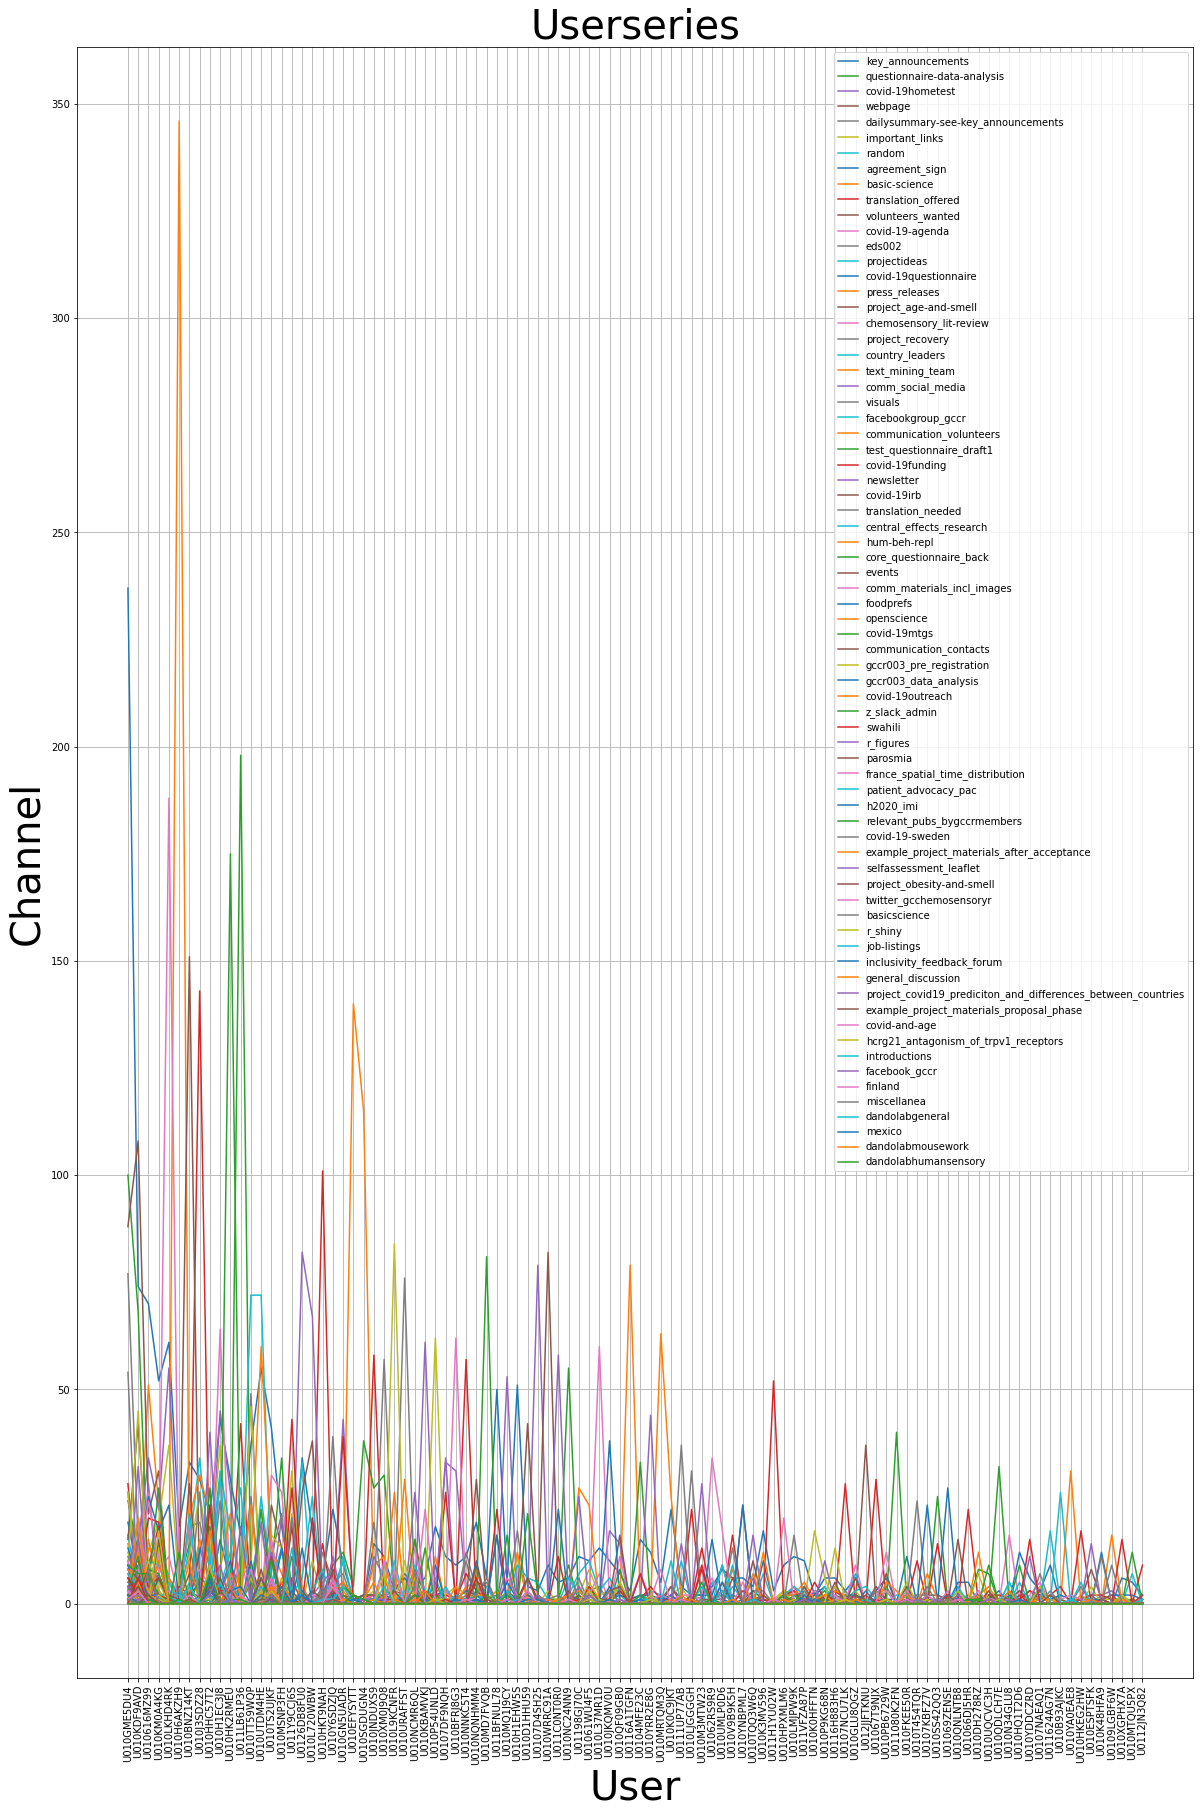

In [44]:
matplotlib.rcParams['figure.figsize'] = [20,30]

for channel_name in unique_Channel_count[1:]:
    #print(channel_name)
    plt.plot(userseries2['id'], userseries2[channel_name],label=channel_name)

plt.title('Userseries', fontsize="40")
plt.xlabel('User',fontsize="40")
plt.ylabel('Channel',fontsize="40")    

    
plt.legend()
plt.xticks(rotation = 90)
plt.grid()
plt.show
plt.savefig("Top100userseries.svg", format="svg")



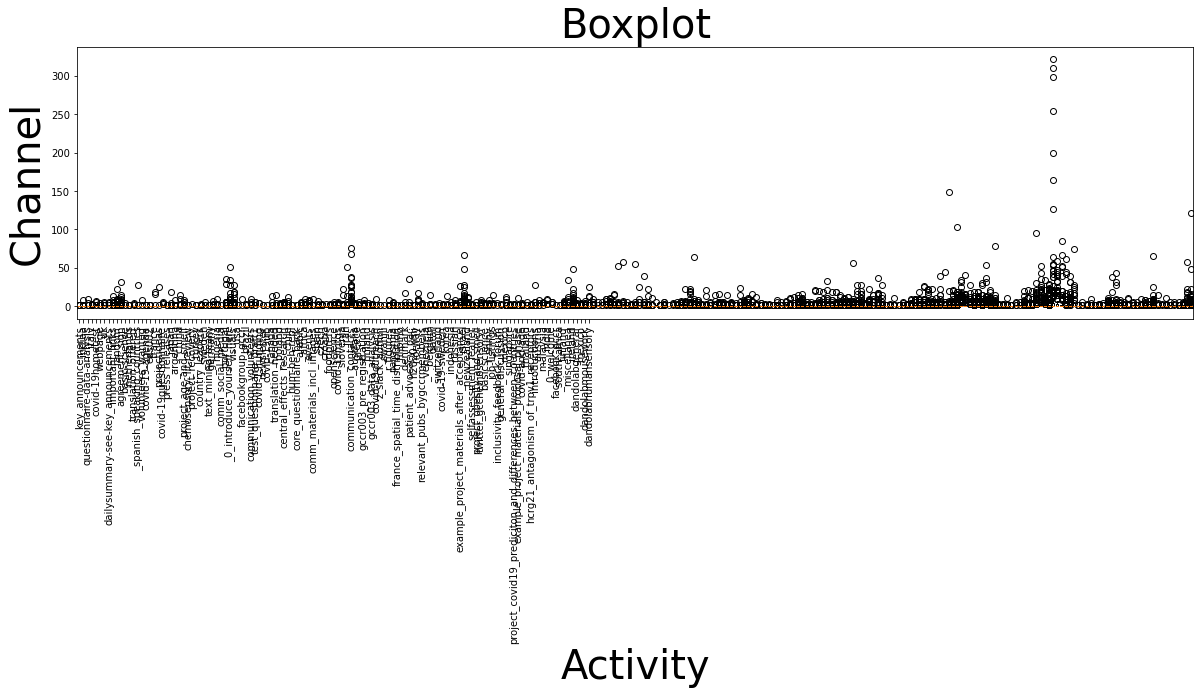

<Figure size 1440x360 with 0 Axes>

In [49]:
new = timeseries
new = new.reset_index()
new.drop('index',axis=1,inplace=True)
new.drop('Date',axis=1,inplace=True)

plt.title('Boxplot',fontsize="40")
plt.xlabel('Activity',fontsize="40")
plt.ylabel('Channel',fontsize="40")   

matplotlib.rcParams['figure.figsize'] = [20,5]

new = new.iloc[:,:]
plt.boxplot(new)
plt.xticks(rotation = 90)
plt.xticks([i for i in range(1,124)],column_names[1:])
plt.show()
plt.savefig("boxplot.svg", format="svg")


In [50]:
country_count = df['Country'].value_counts()
country_count_values = df['Country'].value_counts().keys().tolist()
country_count_counts = df['Country'].value_counts().tolist()

In [47]:
country_count_values

['USA',
 'Netherlands',
 'UK',
 'Belgium',
 'Turkey',
 'India',
 'Israel',
 'Argentina',
 'Russia',
 'Japan',
 'Australia',
 'Morocco',
 'Spain',
 'Brazil',
 'China',
 'Algeria',
 'Finland',
 'Greece',
 'Iran',
 'Zimbabwe',
 'Malaysia',
 'New Zealand',
 'Serbia',
 'Oman',
 'Thailand',
 'Poland',
 'South Korea',
 'Autralia',
 'Colombia',
 'Iraq',
 'Paraguay',
 'Taiwan']

In [51]:
country_count_values[0] = 'Netherlands'
country_count_values[1] = 'USA' 
country_count_values[2] = 'UK' 
country_count_values[3] = 'Belgium' 
country_count_values[4] = 'Turkey' 
country_count_values[5] = 'USA' 
country_count_values[6] = 'India' 
country_count_values[7] = 'Israel' 
country_count_values[8] = 'USA' 
country_count_values[9] = 'USA' 
country_count_values[10] = 'Argentina'

country_count_values[11] = 'Russia' 
country_count_values[12] = 'Japan' 
country_count_values[13] = 'Australia' 
country_count_values[14] = 'USA' 
country_count_values[15] = 'Morocco' 
country_count_values[16] = 'Spain' 
country_count_values[17] = 'Brazil' 
country_count_values[18] = 'China' 
country_count_values[19] = 'Algeria' 
country_count_values[20] = 'Finland' 

country_count_values[21] = 'Greece' 
country_count_values[22] = 'Iran' 
country_count_values[23] = 'Zimbabwe' 
country_count_values[24] = 'USA' 
country_count_values[25] = 'Malaysia' 
country_count_values[26] = 'New Zealand' 
country_count_values[27] = 'Serbia' 
country_count_values[28] = 'Oman' 
country_count_values[29] = 'Thailand' 
country_count_values[30] = 'Poland' 


country_count_values[31] = 'South Korea'
country_count_values[32] = 'Autralia'
country_count_values[33]= 'USA'
country_count_values[34]= 'Colombia'
country_count_values[35]= 'Iraq'
country_count_values[36] = 'Paraguay' 
country_count_values[37] = 'Taiwan'

IndexError: ignored

In [52]:
country_count_values

['Netherlands',
 'USA',
 'UK',
 'Belgium',
 'Turkey',
 'USA',
 'India',
 'Israel',
 'USA',
 'USA',
 'Argentina',
 'Russia',
 'Japan',
 'Australia',
 'USA',
 'Morocco',
 'Spain',
 'Brazil',
 'China',
 'Algeria',
 'Finland',
 'Greece',
 'Iran',
 'Zimbabwe',
 'USA',
 'Malaysia',
 'New Zealand',
 'Serbia',
 'Oman',
 'Thailand',
 'Poland',
 'South Korea']

In [53]:
d=dict()
for i in range(len(country_count_values)):
    
    if country_count_values[i]  in d:
        d[country_count_values[i]] += country_count_counts[i]
        
    else:
        d[country_count_values[i]] = country_count_counts[i]
d

{'Algeria': 51,
 'Argentina': 154,
 'Australia': 94,
 'Belgium': 1060,
 'Brazil': 60,
 'China': 59,
 'Finland': 40,
 'Greece': 35,
 'India': 436,
 'Iran': 35,
 'Israel': 215,
 'Japan': 114,
 'Malaysia': 23,
 'Morocco': 78,
 'Netherlands': 5541,
 'New Zealand': 21,
 'Oman': 14,
 'Poland': 5,
 'Russia': 127,
 'Serbia': 19,
 'South Korea': 1,
 'Spain': 68,
 'Thailand': 6,
 'Turkey': 824,
 'UK': 1685,
 'USA': 5846,
 'Zimbabwe': 33}

In [54]:
sorted_x = sorted(d.items(), key=lambda kv: kv[1], reverse = True)
Country = []
Number= []
for i in sorted_x:
    Country.append(i[0])
    Number.append(i[1])

In [72]:
Number = np.array(Number)
from matplotlib import cm

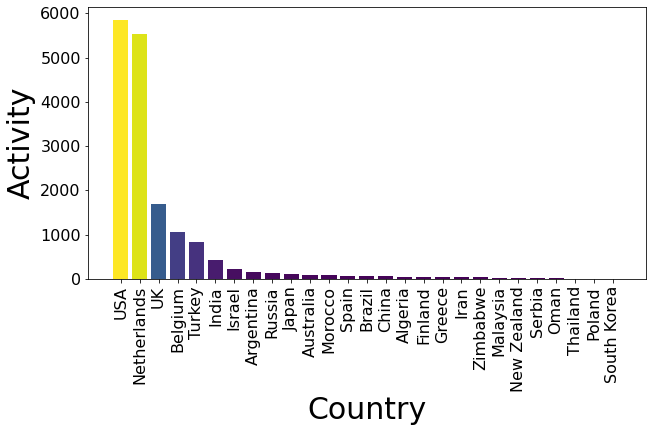

In [90]:

import matplotlib.pyplot as plt 
import matplotlib

#plt.title('Country v/s Activity', fontsize="30")
plt.xlabel('Country',fontsize="30")
plt.ylabel('Activity',fontsize="30")
my_cmap = plt.get_cmap("viridis")
###### Important ==>
colors= cm.viridis(Number/ float(max(Number)))
#plt.bar(Country, Number, color = 'darkred', edgecolor = 'red' )
plt.bar(Country, Number, color=colors )
plt.xticks(rotation = 90)
#plt.grid()
matplotlib.rcParams['figure.figsize'] = [10,5]
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig('/content/drive/MyDrive/GCCR_SlackAPI/API-D.png',dpi= 300, bbox_inches='tight')
plt.show()

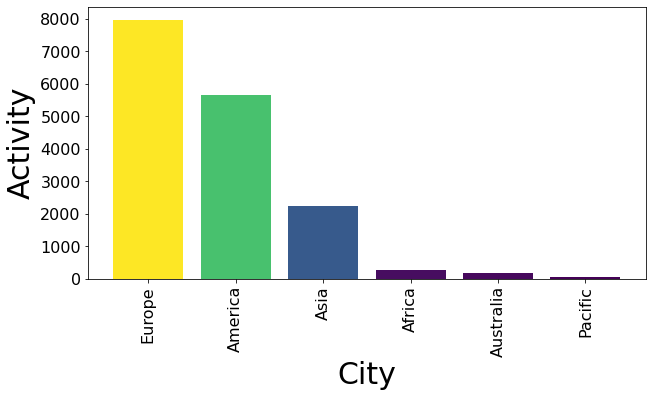

In [89]:
import matplotlib.pyplot as plt 
import matplotlib

#plt.title('City v/s Activity', fontsize="30")
country_count = df['City'].value_counts()
plt.xlabel('City',fontsize="30")
plt.ylabel('Activity',fontsize="30")
###### Important ==>
#plt.bar(country_count_values,country_count_counts, color = 'darkred', edgecolor = 'red')
country_count_counts = np.array(country_count_counts)
colors= cm.viridis(country_count_counts/ float(max(country_count_counts)))

plt.bar(country_count_values,country_count_counts, color = colors)
plt.xticks(rotation = 90)
#plt.grid()
matplotlib.rcParams['figure.figsize'] = [10,5]
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig('/content/drive/MyDrive/GCCR_SlackAPI/API-E.png',dpi= 300, bbox_inches='tight')
plt.show()

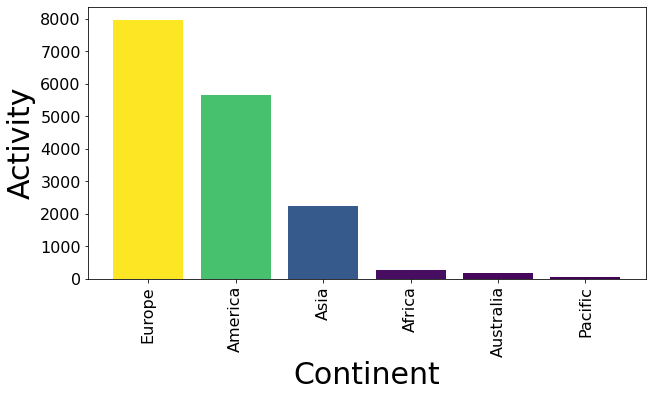

In [88]:
country_count = df['Continent'].value_counts()
country_count =country_count.drop('Indiana')
country_count_values = country_count.keys().tolist()
country_count_counts = country_count.tolist()


#plt.title('Continent v/s Activity', fontsize="30")
plt.xlabel('Continent',fontsize="30")
plt.ylabel('Activity',fontsize="30")
###### Important ==>
#plt.bar(country_count_values,country_count_counts, color = 'darkred', edgecolor = 'red')

country_count_counts = np.array(country_count_counts)
colors= cm.viridis(country_count_counts/ float(max(country_count_counts)))

plt.bar(country_count_values,country_count_counts, color=colors)

plt.xticks(rotation = 90)
#plt.grid()
matplotlib.rcParams['figure.figsize'] = [10,5]
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig('/content/drive/MyDrive/GCCR_SlackAPI/API-F.png',dpi= 300, bbox_inches='tight')
plt.show()

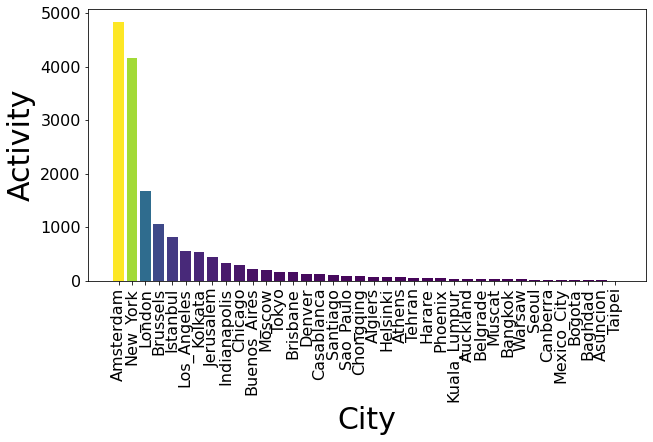

In [87]:
country_count = df['City'].value_counts()
country_count_values = country_count.keys().tolist()
country_count_counts = country_count.tolist()


#plt.title('City v/s Activity', fontsize="30")
plt.xlabel('City',fontsize="30")
plt.ylabel('Activity',fontsize="30")

country_count_counts = np.array(country_count_counts)
colors= cm.viridis(country_count_counts/ float(max(country_count_counts)))

###### Important ==>
#plt.bar(country_count_values,country_count_counts, color = 'darkred', edgecolor = 'red')
plt.bar(country_count_values,country_count_counts, color = colors)

plt.xticks(rotation = 90)
#plt.grid()
matplotlib.rcParams['figure.figsize'] = [10,5]
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig('/content/drive/MyDrive/GCCR_SlackAPI/API-E.png',dpi= 300, bbox_inches='tight')
plt.show()

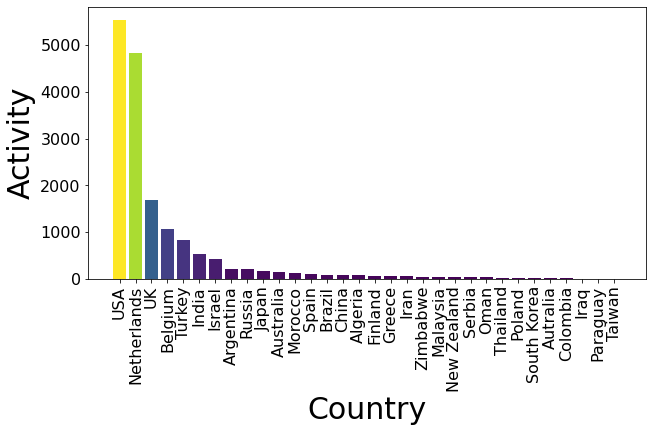

In [79]:
country_count = df['Country'].value_counts()
country_count_values = country_count.keys().tolist()
country_count_counts = country_count.tolist()

country_count_counts = np.array(country_count_counts)
colors= cm.viridis(country_count_counts/ float(max(country_count_counts)))

#plt.title('Country v/s Activity', fontsize="30")
plt.xlabel('Country',fontsize="30")
plt.ylabel('Activity',fontsize="30")
###### Important ==>
#plt.bar(country_count_values,country_count_counts, color = 'darkred', edgecolor = 'red')
plt.bar(country_count_values,country_count_counts, color = colors)
plt.xticks(rotation = 90)

#plt.grid()
matplotlib.rcParams['figure.figsize'] = [10,5]
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [ ]:
country_count = df['real_name'].value_counts()
country_count[:20]